<a href="https://colab.research.google.com/github/daveveed/Geo-Data-Science/blob/main/Mapping_and_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
import os

data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
  os.mkdir(data_folder)
if not os.path.exists(output_folder):
  os.mkdir(output_folder)

In [3]:
import requests
def download(url):
  filename = os.path.join(data_folder, os.path.basename(url))
  if not os.path.exists(filename):
    response = requests.get(url, allow_redirects=True) #download the content

    with open(filename, 'wb') as f: #saving to file
      f.write(response.content)

    print('Downloaded', filename)


In [4]:
download('https://naciscdn.org/naturalearth/10m/cultural/' +
         'ne_10m_populated_places_simple.zip')

Downloaded data/ne_10m_populated_places_simple.zip


In [5]:
file_path = os.path.join(data_folder, 'ne_10m_populated_places_simple.zip')
places = gpd.read_file(file_path)

places

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,8.0,Admin-1 capital,Colonia del Sacramento,None,None,Colonia del Sacramento,0,0,...,21714,21714,0.0,7,7,None,None,9.0,1159112629,POINT (-57.83612 -34.46979)
1,10,1,8.0,Admin-1 capital,Trinidad,None,None,Trinidad,0,0,...,21093,21093,0.0,7,7,None,None,9.0,1159112647,POINT (-56.901 -33.544)
2,10,1,8.0,Admin-1 capital,Fray Bentos,None,None,Fray Bentos,0,0,...,23279,23279,0.0,7,7,None,None,9.0,1159112663,POINT (-58.304 -33.139)
3,10,1,8.0,Admin-1 capital,Canelones,None,None,Canelones,0,0,...,19698,19698,0.0,6,6,None,None,9.0,1159112679,POINT (-56.284 -34.538)
4,10,1,8.0,Admin-1 capital,Florida,None,None,Florida,0,0,...,32234,32234,0.0,7,7,None,None,7.0,1159112703,POINT (-56.215 -34.099)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,0,600,1.0,Admin-1 capital,Rio de Janeiro,None,None,Rio de Janeiro,0,0,...,11748000,2010175,1821489.0,14,12,Rio de Janeiro,Rio de Janeiro,1.7,1159151619,POINT (-43.21212 -22.90731)
7338,0,600,1.0,Admin-1 capital,São Paulo,None,Sao Paulo|Sio Paulo,Sao Paulo,0,0,...,18845000,10021295,11522944.0,14,14,S,Sao Paolo,3.0,1159151621,POINT (-46.62697 -23.55673)
7339,0,600,3.0,Admin-1 capital,Sydney,None,None,Sydney,0,0,...,4630000,3641422,2669348.0,12,12,Sydney,Sydney1,1.7,1159151623,POINT (151.21255 -33.87137)
7340,0,600,0.0,Admin-0 capital,Singapore,None,None,Singapore,1,0,...,5183700,3289529,3314179.0,13,12,Singapore,Singapore,2.1,1159151627,POINT (103.85387 1.29498)


In [6]:
# where the adm0cap = 1 are the capital cities
capitals = places[places['adm0cap'] == 1]
capitals

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
880,8,10,3.0,Admin-0 capital,Vatican City,None,None,Vatican City,1,0,...,832,832,562430.0,2,2,None,Vatican City,7.0,1159127243,POINT (12.45339 41.90328)
4828,7,20,0.0,Admin-0 capital,San Marino,None,None,San Marino,1,0,...,29579,29000,0.0,7,7,None,San Marino,6.1,1159146051,POINT (12.44177 43.9361)
4833,7,20,0.0,Admin-0 capital,Vaduz,None,None,Vaduz,1,0,...,36281,5342,33009.0,7,5,None,Vaduz,6.7,1159146061,POINT (9.51667 47.13372)
5012,6,30,8.0,Admin-0 capital,Luxembourg,None,None,Luxembourg,1,0,...,107260,76684,106219.0,9,8,None,Luxembourg,6.0,1159146437,POINT (6.13 49.61166)
6178,6,30,0.0,Admin-0 capital,Palikir,None,None,Palikir,1,0,...,4645,4645,0.0,4,4,None,Palikir,6.0,1159149061,POINT (158.14997 6.91664)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7330,0,600,3.0,Admin-0 capital,Cairo,None,Al-Qahirah,Cairo,1,0,...,11893000,7734614,13720557.0,14,13,Al-Qahirah,Cairo,1.7,1159151603,POINT (31.24802 30.05191)
7332,0,600,2.0,Admin-0 capital,Tokyo,None,None,Tokyo,1,0,...,35676000,8336599,12945252.0,14,13,Tokyo,Tokyo,1.7,1159151609,POINT (139.74946 35.68696)
7334,0,600,3.0,Admin-0 capital,Paris,None,None,Paris,1,0,...,9904000,11177,7142744.0,13,6,Paris,Paris,1.7,1159151613,POINT (2.35299 48.85809)
7335,0,600,3.0,Admin-0 capital,Santiago,None,None,Santiago,1,0,...,5720000,46611,3066651.0,13,7,Santiago,Santiago3,2.0,1159151615,POINT (-70.6505 -33.44021)


In [7]:
output_file = 'capitals.gpkg'
output_path = os.path.join(output_folder, output_file)
capitals.to_file(output_path, driver='GPKG')

## Matplotlib
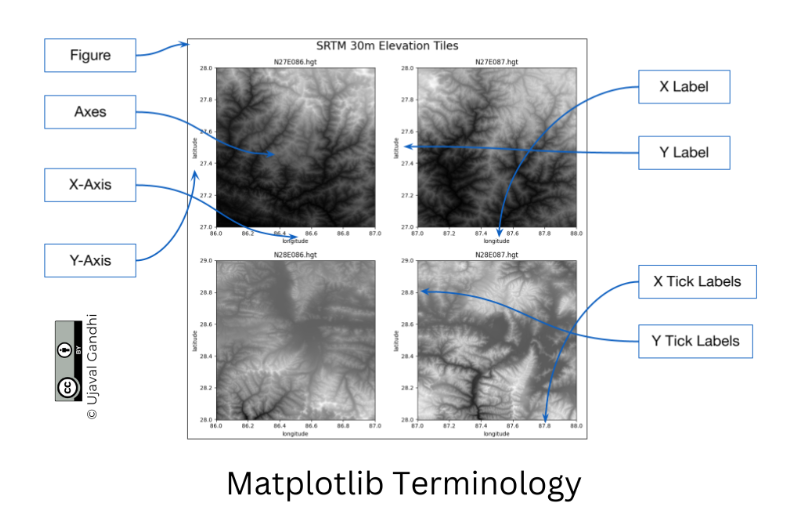


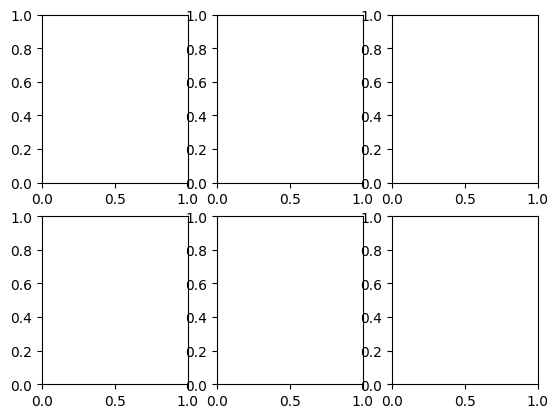

In [8]:
fig, ax = plt.subplots(2,3) # create a figure with these axes specs : 2 rows and 3 columns

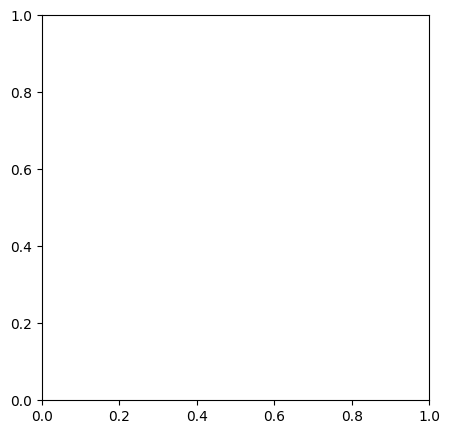

In [9]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
plt.show()

In [10]:
point = (0.5,0.5)

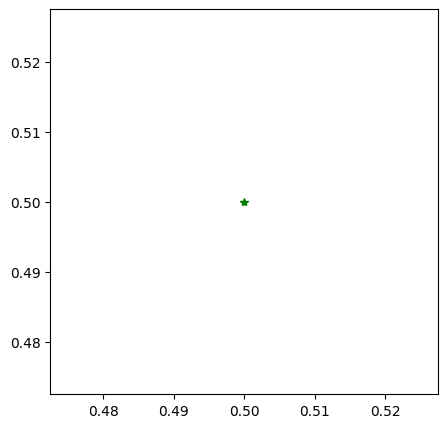

In [12]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
ax.plot(point[0], point[1], color='green', marker= '*')
plt.show()

In [16]:
points = [(0.1,0.5), (0.5,0.5), (0.9,0.5)]
#use the zip funtion to group the x and y
x,y = zip(*points)
print (x)
print (y)

(0.1, 0.5, 0.9)
(0.5, 0.5, 0.5)


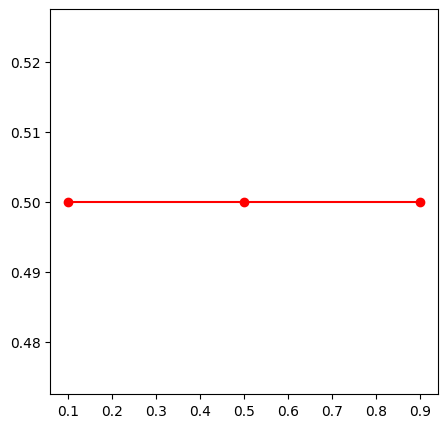

In [22]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(5,5)
ax.plot(x,y, color='red', marker='o')#set linestyle='None' when you dont want the line

output_path = os.path.join(output_folder, 'image.png')
plt.savefig(output_path)
plt.show()


## Creating charts

In [23]:
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]


data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/police.uk/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)

Downloaded data/2020-01-metropolitan-street.csv
Downloaded data/2020-02-metropolitan-street.csv
Downloaded data/2020-03-metropolitan-street.csv
Downloaded data/2020-04-metropolitan-street.csv
Downloaded data/2020-05-metropolitan-street.csv
Downloaded data/2020-06-metropolitan-street.csv
Downloaded data/2020-07-metropolitan-street.csv
Downloaded data/2020-08-metropolitan-street.csv
Downloaded data/2020-09-metropolitan-street.csv
Downloaded data/2020-10-metropolitan-street.csv
Downloaded data/2020-11-metropolitan-street.csv
Downloaded data/2020-12-metropolitan-street.csv


In [24]:
dataframe_list = []

for f in files:
  file_path = os.path.join(data_folder, f)
  df = pd.read_csv(file_path)
  dataframe_list.append(df)

merged_df = pd.concat(dataframe_list)

In [25]:
merged_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,24c2b43c34c7cd6ef847d69fbb042c9c730b1eebe95c52...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.539301,50.817200,On or near Highdown Drive,E01031469,Arun 009F,Other theft,Status update unavailable,NaN
1,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87931,05780af1c8515c41499ef396a33fc4e5c248533cecd9c4...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Investigation complete; no suspect identified,NaN
87932,54ce60d717f01752c5ff44f870e07a503e3fbeaae0b91e...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN
87933,580fdc2edfe26a09392ab6b9128732ba0c7cd05695387a...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Offender given a caution,NaN
87934,2730906a962972bed3589463c9be9dbb8ee8e594b779a3...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN


In [28]:
type_counts = merged_df.groupby('Crime type').size()
type_counts

,0
Crime type,
Anti-social behaviour,415105
Bicycle theft,23517
Burglary,61044
Criminal damage and arson,50923
Drugs,51629
Other crime,10066
Other theft,81924
Possession of weapons,5763
Public order,53458


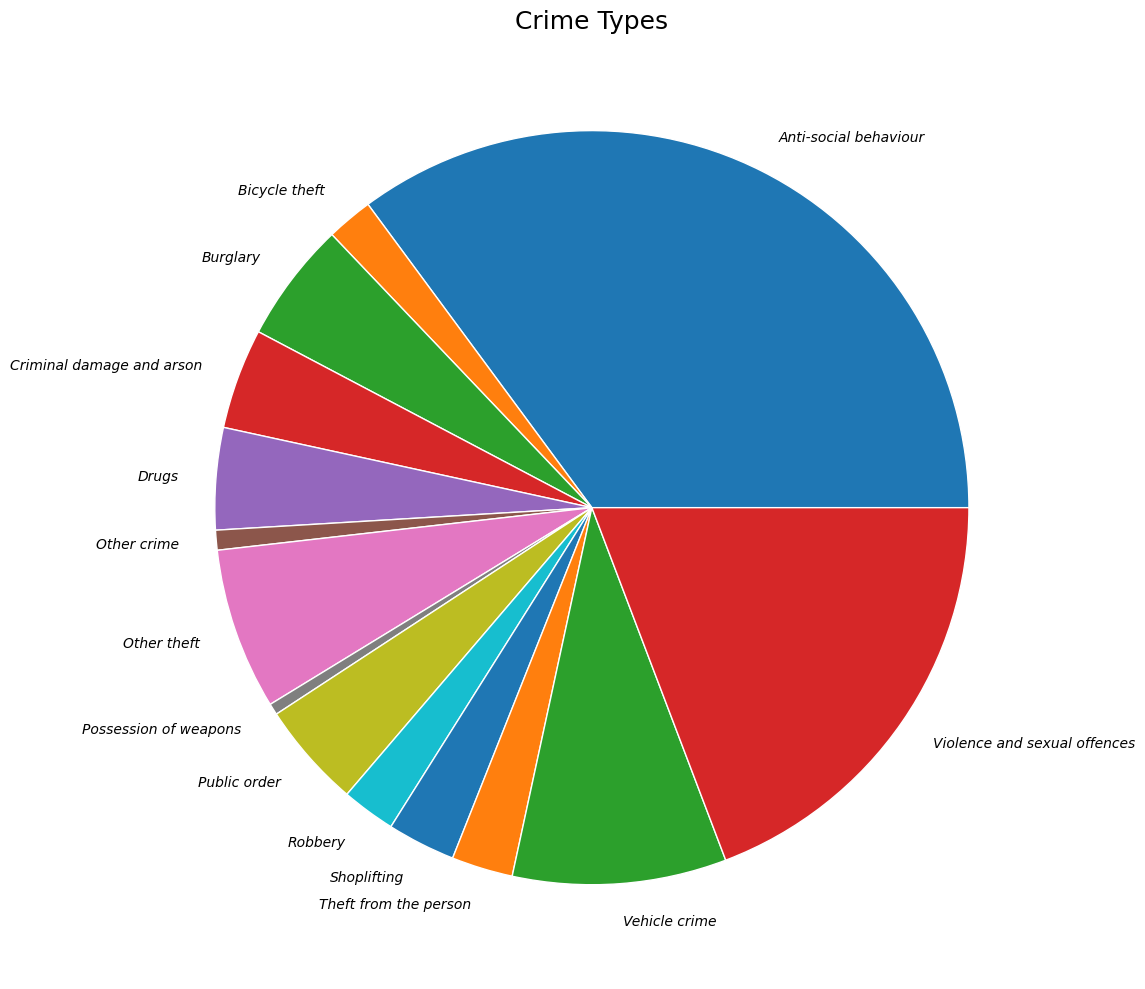

In [32]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,10)
#type_counts.plot(kind='pie', ax = ax)

wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
textprops= {'fontsize': 10, 'fontstyle': 'italic'}

type_counts.plot(kind='pie', ax=ax,
                 wedgeprops=wedgeprops,
                 textprops=textprops
                 )

ax.set_title('Crime Types', fontsize = 18)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [33]:
monthly_counts = merged_df.groupby('Month').size()
monthly_counts

,0
Month,
2020-01,90979
2020-02,86984
2020-03,87409
2020-04,109951
2020-05,114008
2020-06,100198
2020-07,103657
2020-08,104782
2020-09,99633


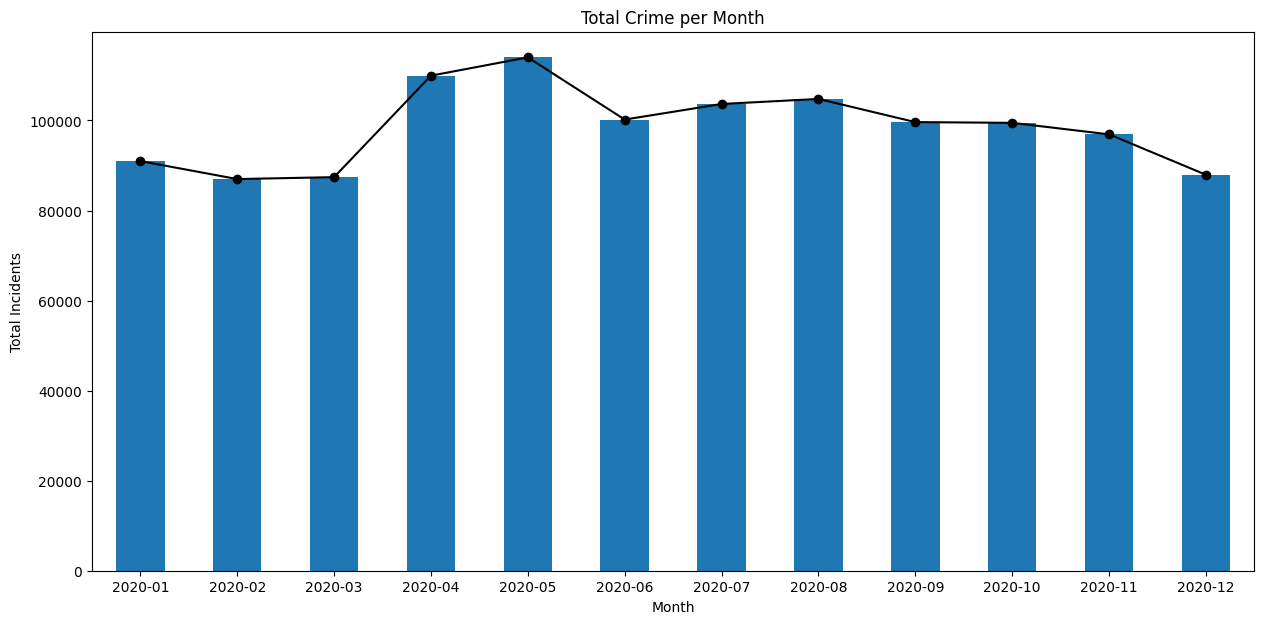

In [36]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(15,7)

monthly_counts.plot(kind='bar', ax=ax)
monthly_counts.plot(kind='line',ax=ax, marker = 'o', color = 'black')

ax.set_title('Total Crime per Month')
ax.set_ylabel('Total Incidents')

plt.show()